<a href="https://colab.research.google.com/github/vamsikrishna077/CODEWAY/blob/main/spamsmsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer,PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
!unzip spamsms.zip

In [ ]:
data='spam.csv'
data=pd.read_csv(data,encoding="latin-1",engine='python')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
column_to_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(column_to_drop,inplace=True,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
data.isnull().any().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['target']=label.fit_transform(data['target'])
data.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


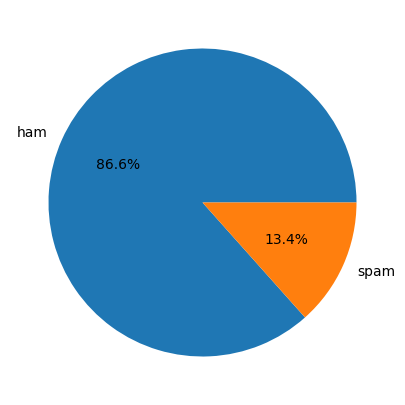

In [ ]:
plt.figure(figsize=(5,5))

plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [ ]:
nltk.download('punkt')
data['characters'] = data['text'].apply(len)
data['words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Axes: xlabel='words', ylabel='Count'>

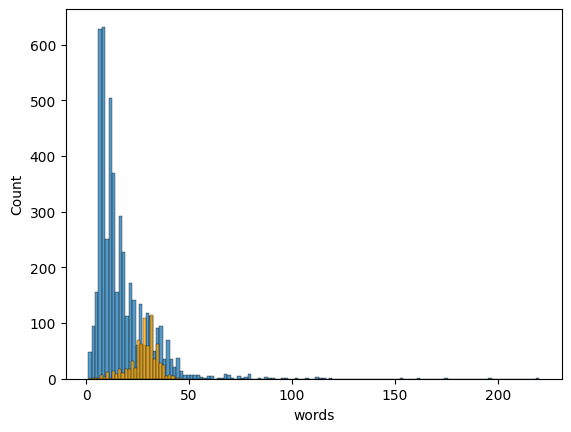

In [ ]:
sns.histplot(data[data['target'] == 0]['words'])
sns.histplot(data[data['target'] == 1]['words'],color='orange')

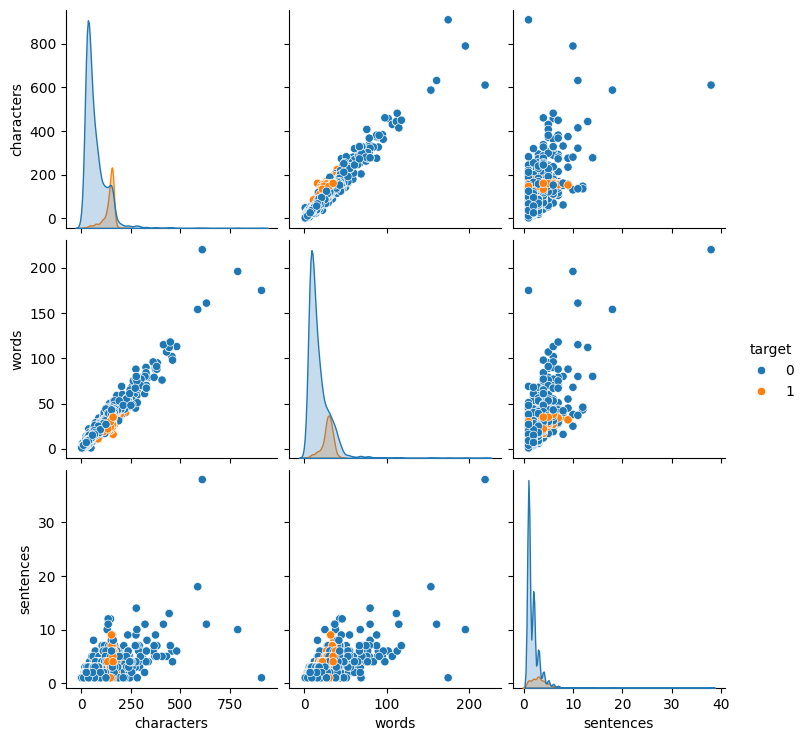

In [ ]:
sns.pairplot(data,hue='target')

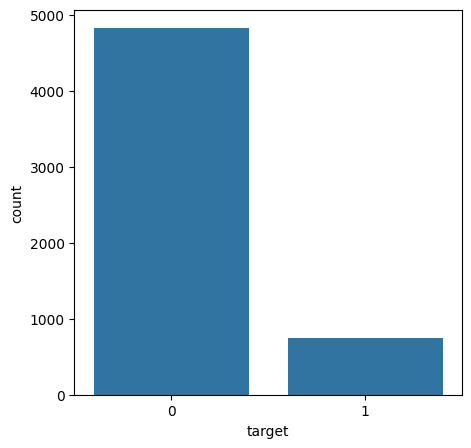

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='target',order=data['target'].value_counts().index)
plt.show()

In [ ]:
stemmer=LancasterStemmer()
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head(2)

,target,text,characters,words,sentences
0,0,jurong point crazy available bugis great world...,111,24,2
1,0,lar joking wif oni,29,8,2


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)  # replace twitter accounts with a space
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'#','',text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 1])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text
data['text_trans']=data['text'].apply(clean_text)
data.head(2)

,target,text,characters,words,sentences,text_trans
0,0,jurong point crazy available bugis great world...,111,24,2,jurong point crazy available bugis great world...
1,0,lar joking wif oni,29,8,2,lar joking wif oni


In [ ]:
clean_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight cried enough today'

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target']==1]['text_trans'].str.cat(sep=" "))

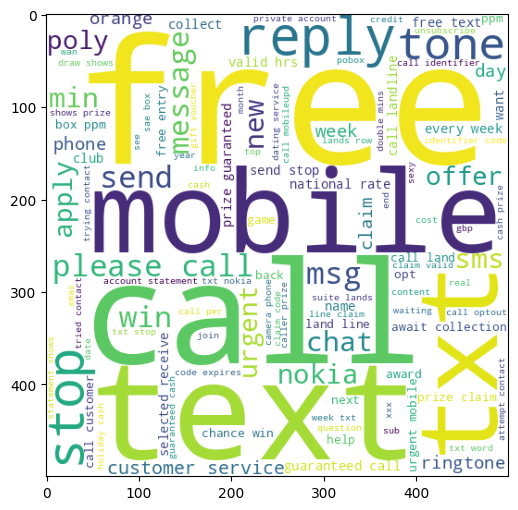

In [ ]:
plt.figure(figsize=(13,6))        #for spam
plt.imshow(spam_wc)

In [ ]:
st = PorterStemmer()
data['text_trans'] = data['text_trans'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))



In [ ]:
data.head(2)

,target,text,characters,words,sentences,text_trans
0,0,jurong point crazy available bugis great world...,111,24,2,jurong point crazi avail bugi great world buff...
1,0,lar joking wif oni,29,8,2,lar joke wif oni


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['text_trans']).toarray()

y = data['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.svm import LinearSVC
sv_model = LinearSVC(max_iter=1000)
sv_model.fit(X_train,y_train)
predict_sv=sv_model.predict(X_test)
print(classification_report(y_test, predict_sv))
sv_accuracy = accuracy_score(y_test,predict_sv)
print('Support vector accuracy is: {:.2f}%'.format(sv_accuracy*100))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       957
           1       0.99      0.87      0.93       158

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Support vector accuracy is: 98.12%


In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
predict_lr=lr_model.predict(X_test)
print(classification_report(y_test, predict_lr))
lr_accuracy = accuracy_score(y_test, predict_lr)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_accuracy * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       0.98      0.68      0.80       158

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115

Logistic Regression accuracy is: 95.25%


In [ ]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)
predict_nv=nv_model.predict(X_test)
print(classification_report(y_test, predict_nv))
nv_accuracy = accuracy_score(y_test, predict_nv)
print('Navie bayes accuracy is: {:.2f}%'.format(nv_accuracy * 100))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       957
           1       0.96      0.77      0.85       158

    accuracy                           0.96      1115
   macro avg       0.96      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115

Navie bayes accuracy is: 96.23%


In [54]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       957
           1       0.88      0.13      0.23       158

    accuracy                           0.87      1115
   macro avg       0.87      0.56      0.58      1115
weighted avg       0.87      0.87      0.83      1115

ID3 model accuracy is: 87.44%


In [55]:
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       957
           1       0.97      0.82      0.89       158

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

XGBoost model accuracy is: 97.04%


In [57]:

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.76      0.86       158

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Random Forest model accuracy is: 96.59%


In [59]:
Algorithms = ['XGBClassifier', 'RandomForest', 'ID3', 'Logistic Regression', 'SVC', 'GaussianNB']
accuracy = [XGB_accuracy, RF_accuracy, ID3_accuracy, lr_accuracy, sv_accuracy, nv_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,XGBClassifier,0.970404
1,RandomForest,0.965919
2,ID3,0.874439
3,Logistic Regression,0.952466
4,SVC,0.981166
5,GaussianNB,0.962332


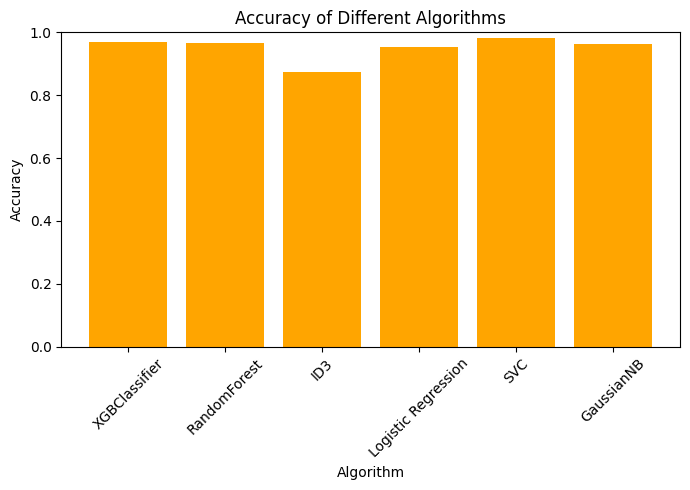

In [60]:

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'],color='orange')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
